In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

y = mx + b

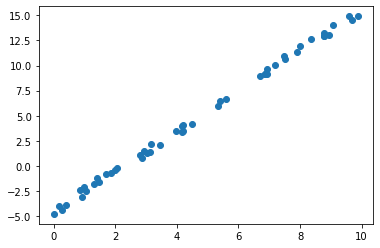

In [8]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)

graph.scatter(x, y)
graph.show()

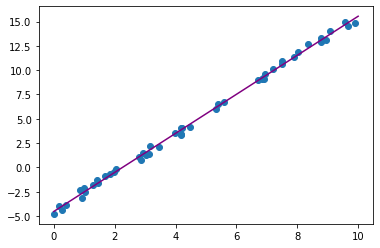

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

graph.scatter(x, y)
graph.plot(xfit, yfit, color='purple')
graph.show()

In [13]:
print(f'Model slope= {model.coef_[0].round(2)}')
print(f'Model intercept = {model.intercept_.round(2)}')

Model slope= 2.01
Model intercept = -4.53


# Multidimensional Linear Models

In [14]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(x, [1.5, -2.0, 1.0])

model.fit(x, y)
print(model.intercept_, model.coef_)

0.50000000000001 [ 1.5 -2.   1. ]


# Polynomial Basis Function

In [15]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [32]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(6), 
                           LinearRegression())

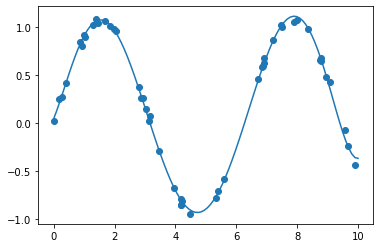

In [33]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.rand(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

graph.scatter(x, y)
graph.plot(xfit, yfit)
graph.show()

# Gaussian Basis Function

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian Features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None) :
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # Create N centers spread along data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

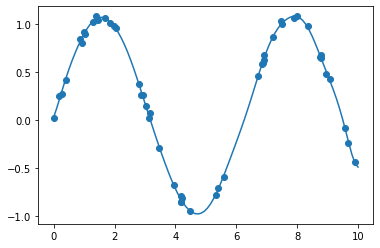

In [36]:
gauss_model = make_pipeline(GaussianFeatures(20), 
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

graph.scatter(x, y)
graph.plot(xfit, yfit)
graph.show()

# Regularization

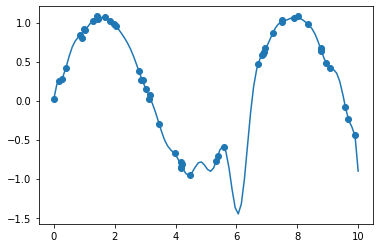

In [37]:
model = make_pipeline(GaussianFeatures(30), 
                      LinearRegression())

model.fit(x[:, np.newaxis], y)

graph.scatter(x, y)
graph.plot(xfit, model.predict(xfit[:, np.newaxis]))
graph.show()

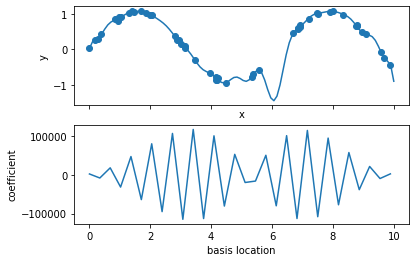

In [39]:
def basis_plot(model, title=None):
    fig, ax = graph.subplots(2, sharex=True)
    
    model.fit(x[:, np.newaxis], y)
    
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y')
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel = 'basis location', ylabel = 'coefficient')
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

# Types of Regularization

## Ridge Regression (L2 Regularization) 
Penalise sum of squares (2-norms) of the model coefficients, controlled by alpha <br>
Higher alpha, more penalization!

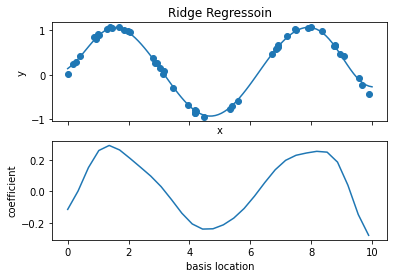

In [44]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.5))

basis_plot(model, title='Ridge Regressoin')

## Lasso Regression
Penalize sum of absolute values (1-norms) of regression coefficients <br>
Favor sparse models where possible, preferentially sets model coefficients to exactly zero <br>
Higher alpha, more penalizations

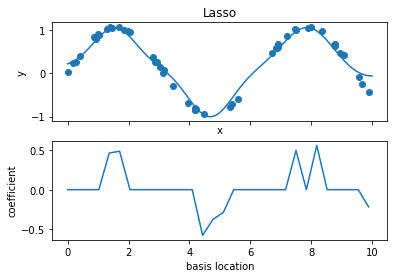

In [47]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.01))
basis_plot(model, title='Lasso')

# Example: Predictin Bicycle Traffic

In [48]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4315k    0 4315k    0     0   912k      0 --:--:--  0:00:04 --:--:-- 1024k8k    0     0   511k      0 --:--:--  0:00:03 --:--:--  511k


In [54]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('/mnt/c/Users/imrit/Downloads/FreemontBicyleWeather.csv', index_col='DATE', parse_dates=True)
display(counts.head())
display(weather.head())

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


,STATION,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-02,USW00024233,9.17,NaN,0.0,0.0,0.0,NaN,64,50,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,USW00024233,16.33,NaN,0.0,0.0,0.0,NaN,66,46,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,14.54,NaN,0.0,0.0,0.0,NaN,66,47,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,12.75,NaN,0.0,0.0,0.0,NaN,71,48,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,11.41,NaN,0.0,0.0,0.0,NaN,75,46,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
daily = counts.resample('d').sum()
daily['total'] = daily.sum(axis=1)
display(daily.head())
daily = daily[['total']]
display(daily.head())

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total
Date,,,,
2012-10-03,7042.0,3520.0,3522.0,14084.0
2012-10-04,6950.0,3416.0,3534.0,13900.0
2012-10-05,6296.0,3116.0,3180.0,12592.0
2012-10-06,4012.0,2160.0,1852.0,8024.0
2012-10-07,4284.0,2382.0,1902.0,8568.0


,total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0


In [68]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

display(daily.head())

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

display(daily.head())

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


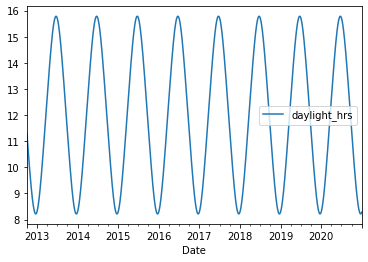

In [70]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
graph.show()

In [71]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
display(daily.head())

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.560,1
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.565,1
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,0.595,1
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,0.605,1
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,0.605,1


In [72]:
daily['annual'] = (daily.index - daily.index[0]).days / 365
display(daily.head())

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.560,1,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.565,1,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,0.595,1,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,0.605,1,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,0.605,1,0.010959


In [75]:
daily.dropna(axis=0, how='any', inplace=True)

x = daily[daily.columns.difference(['total'])]
y = daily['total']

print(x.shape, y.shape)

(3012, 13) (3012,)


In [77]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
daily['predicted'] = model.predict(x)
display(daily.head())

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.560,1,0.000000,14852.241945
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.565,1,0.002740,14408.678402
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,0.595,1,0.005479,13664.149079
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,0.605,1,0.008219,8796.199159
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,0.605,1,0.010959,8453.260280


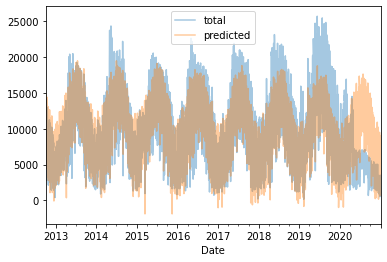

In [78]:
daily[['total', 'predicted']].plot(alpha=0.4)
graph.show()

In [79]:
params = pd.Series(model.coef_, index=x.columns)
print(params)

Fri            -1.809685e+03
Mon            -5.196344e+02
PRCP           -1.722980e+08
Sat            -6.808661e+03
Sun            -7.128859e+03
Temp (C)        1.538184e+04
Thu            -6.265391e+02
Tue            -5.379854e+01
Wed            -1.289488e+02
annual         -2.180792e+02
daylight_hrs    3.827870e+02
dry day         2.050531e+03
holiday        -4.349167e+03
dtype: float64


In [80]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(x, y)).coef_ for i in range(1000)], 0)

In [81]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

                   effect       error
Fri               -1810.0       383.0
Mon                -520.0       381.0
PRCP         -172298008.0  14363615.0
Sat               -6809.0       382.0
Sun               -7129.0       387.0
Temp (C)          15382.0       942.0
Thu                -627.0       374.0
Tue                 -54.0       386.0
Wed                -129.0       379.0
annual             -218.0        33.0
daylight_hrs        383.0        39.0
dry day            2051.0       142.0
holiday           -4349.0       410.0
